# Introduccion

 las neuronas

<img src='https://upload.wikimedia.org/wikipedia/commons/3/30/Chemical_synapse_schema_cropped.jpg' width=400>

# Perceptron como modelo de clasificacion

"las neuronas"

![](https://i.stack.imgur.com/Ql0YP.png)





In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X,y=make_classification(n_samples=500,n_features=2,n_redundant=0,random_state=23)

In [ ]:
X.shape

(500, 2)

In [ ]:
y.shape

(500,)

In [ ]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['y']=y

<Axes: xlabel='x1', ylabel='x2'>

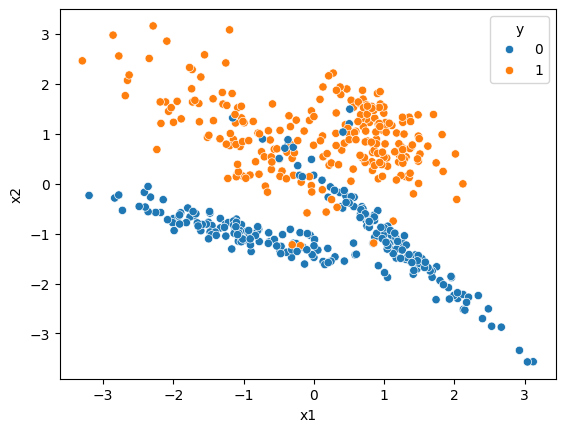

In [ ]:
sns.scatterplot(df,x='x1',y='x2',hue='y')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.888

In [ ]:
model.coef_

array([[0.65224591, 3.5761591 ]])

In [ ]:
model.intercept_

array([-0.13729531])

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
import numpy as np
feature_1, feature_2 = np.meshgrid(
np.linspace(df.iloc[:, 0].min(), df.iloc[:, 0].max()),
np.linspace(df.iloc[:, 1].min(), df.iloc[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

y_pred = np.reshape(model.predict(grid), feature_1.shape)

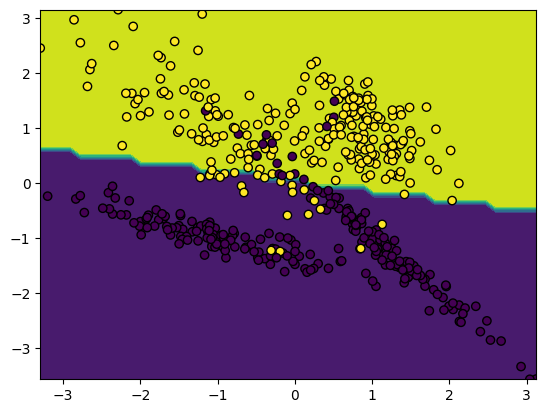

In [ ]:
display = DecisionBoundaryDisplay( xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.y, edgecolor="black")


In [ ]:
def plot_frontera(modelo):
  y_pred = np.reshape(modelo.predict(grid), feature_1.shape)
  display = DecisionBoundaryDisplay( xx0=feature_1, xx1=feature_2, response=y_pred)
  display.plot()
  display.ax_.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.y, edgecolor="black")


## Perceptron en sklearn

![](https://i.stack.imgur.com/Ql0YP.png)

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)


Perceptron()

In [ ]:
X_train.shape

(375, 2)

In [ ]:
# nuestro problema tiene x1 y x2

In [ ]:
clf.coef_

array([[-0.63149965,  2.84501421]])

In [ ]:
# b1 y b2

In [ ]:
clf.intercept_

array([0.])

In [ ]:
# b0

In [ ]:
# 3 coeficientes

In [ ]:
clf.score(X_test,y_test)

0.872

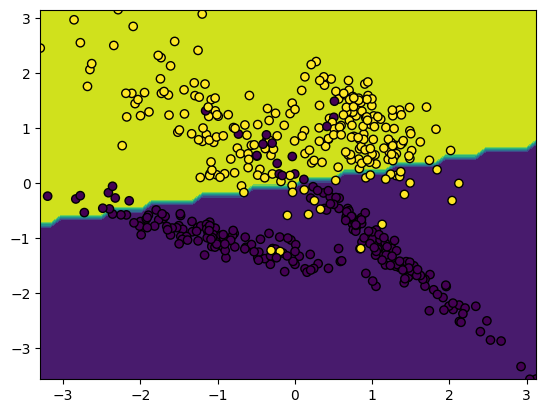

In [ ]:
plot_frontera(clf)

No es una regresion logistica con sombrero nuevo?

Un modelo que era una combinacion lineal de las features que tiraba 0 y 1....


# Multi-Layer Perceptron

![](https://www.researchgate.net/publication/354817375/figure/fig2/AS:1071622807097344@1632506195651/Multi-layer-perceptron-MLP-NN-basic-Architecture.jpg)




![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*bhFifratH9DjKqMBTeQG5A.gif)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
red_multicapa=MLPClassifier(hidden_layer_sizes=(5,3))

In [ ]:
red_multicapa.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 3))

In [ ]:
red_multicapa.score(X_test,y_test)

0.904

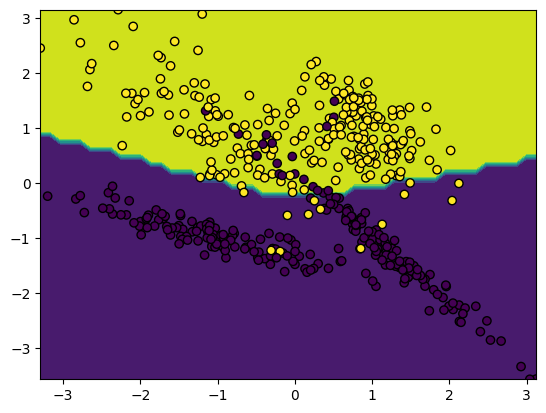

In [ ]:
plot_frontera(red_multicapa)

In [ ]:
red_multicapa.coefs_

[array([[-1.25660664,  0.5873061 , -1.04281984, -0.25274995,  0.05305379],
        [ 0.21204317, -1.03897417, -0.96494577, -0.94626437,  0.65547686]]),
 array([[ 0.68491029,  0.39264418, -0.03408884],
        [-0.56145384,  0.42488139, -0.38179675],
        [-0.54620232,  0.65188595,  0.02394169],
        [-0.65847492,  0.63437702, -0.21453492],
        [ 0.42322237, -1.10434783, -0.46840383]]),
 array([[ 1.08948076],
        [-1.09429777],
        [ 0.3293729 ]])]

In [ ]:
len(red_multicapa.coefs_)

3

In [ ]:
for i,x in enumerate(red_multicapa.coefs_):
  print('capa', i+1)
  print(' # betas: ', x.shape[0]*x.shape[1])

capa 1
 # betas:  10
capa 2
 # betas:  15
capa 3
 # betas:  3


In [ ]:
red_multicapa.intercepts_

[array([-0.06332077,  0.07179765, -0.43574683,  0.05010658,  0.41576374]),
 array([ 0.42451496,  0.67051303, -0.22929797]),
 array([0.35093005])]

In [ ]:
for i,x in enumerate(red_multicapa.intercepts_):
  print('capa', i+1)
  print('# interceptos',x.shape[0])

capa 1
# interceptos 5
capa 2
# interceptos 3
capa 3
# interceptos 1


In [ ]:
!git clone https://github.com/jzliu-100/visualize-neural-network.git
!pip install palettable

Cloning into 'visualize-neural-network'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 64 (delta 0), reused 0 (delta 0), pack-reused 61 (from 1)
Receiving objects: 100% (64/64), 3.83 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (28/28), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
%cd visualize-neural-network/
import VisualizeNN as VisNN


/content/visualize-neural-network


In [ ]:
network_structure = np.hstack(([X_train.shape[1]], np.asarray(red_multicapa.hidden_layer_sizes), [1]))


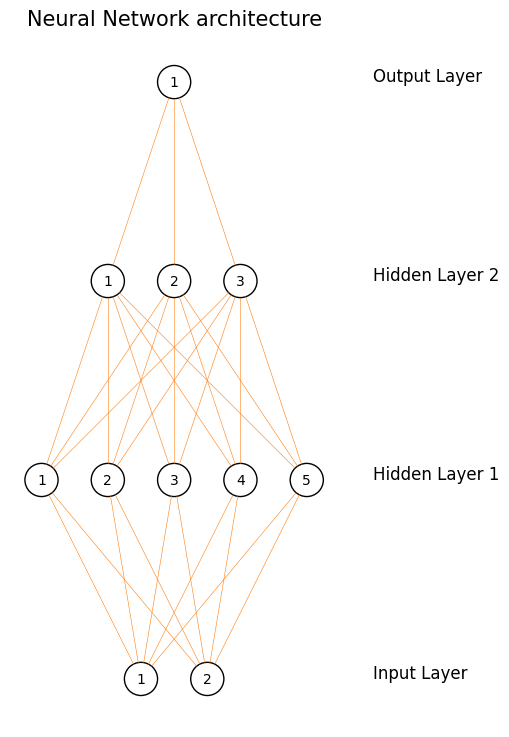

In [ ]:
# Draw the Neural Network without weights
network=VisNN.DrawNN(network_structure)
network.draw()

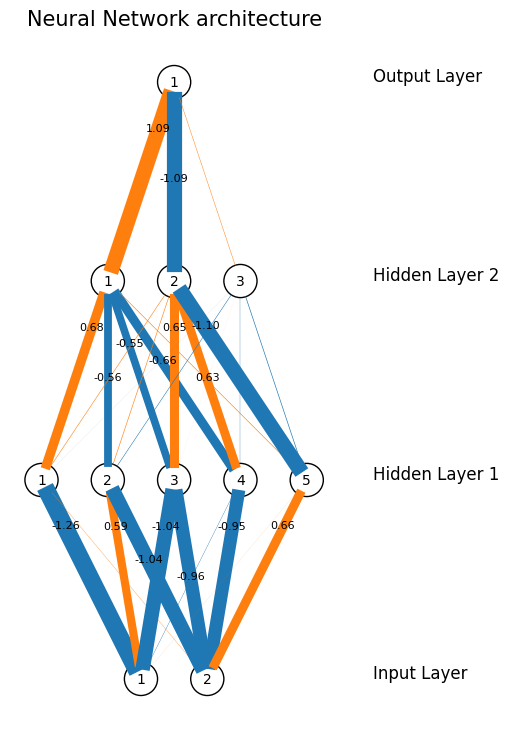

In [ ]:
# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, red_multicapa.coefs_)
network.draw()



In [ ]:
# 400 neuronas en la primer capa
# 250 en la segunda
# 100 en la tercera

red_multicapa=MLPClassifier(hidden_layer_sizes = (400,250,100))
red_multicapa.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=(400, 250, 100))

In [ ]:
red_multicapa.score(X_test,y_test)

0.944

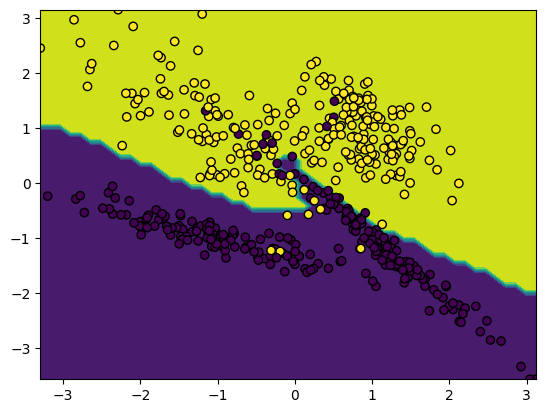

In [ ]:
plot_frontera(red_multicapa)

# Como se usan?

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*BRJfFo9EoPVoLCujKNUMmg.gif)


Este ejemplo es un clasificador que tiene como input x1,x2,x3,x4 y el ouput es y.

Tiene 2 capas ocultas de 3 neuronas cada una.



![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*_pVR7t5peJbI6s-QrxSO5w.png)


En este caso el ouput es 0.55 por lo tanto 1.

In [ ]:
red_multicapa.predict([X_test[0]])

array([1])

#Como se entrenan?



## Descenso gradiente

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*BuH8vMpx9ZYH8Xx4)

https://lukaszkujawa.github.io/gradient-descent.html





## Backpropagation


![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*NY9pZsgnV1UiV8fx_vtgzA.png)


Minimizando la funcion de costo se consigue encontrar los parametros optimos. Como son varias capas las funcion de costo depende de manera indirecta de cada uno, el concepto es el mismo, hay que derivar.

![](https://www.oreilly.com/api/v2/epubs/9781789130331/files/assets/85cb6c18-9cbc-44ff-9db6-c7d90d3c7cf0.png)

![](https://miro.medium.com/v2/resize:fit:1200/format:webp/1*-TZoVX3M_aHv6IbiZqsNkA.gif)


https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0

# Por que Deep Learning?

* En teoria una red neuronal de una sola capa con muchas neuronas, podria aproximar cualquier funcion, pero es mas eficiente entrenar una red de varias capaz de tamaño reducido.

* Como controlamos la complejidad (capacidad de aprendizaje) de una red?

    * Numero de Neuronas (width).
    * Numero de Layers (depth).

* Redes con mas capas (deep networks) permiten usar menos parametros, las redes con pocas capas (shallow networks)  no son buenas para abstraer conocimiento (reducir la dimensionalidad) https://arxiv.org/pdf/1312.6098.pdf

![](https://www.researchgate.net/profile/Yali-Nie/publication/326531654/figure/fig17/AS:650654590717968@1532139551523/Layers-and-their-abstraction-in-deep-learning-Image-recognition-as-measured-by-ImageNet.png)

* Relational and semantic knowledge can be obtained at higher levels of abstraction and representation of the raw data (Yoshua Bengio and Yann LeCun, Scaling Learning Algorithms towards AI, 2007).

* Deep architectures can be representationally efficient. This sounds contradictory, but its a great benefit because of the distributed representation power by deep learning.

* The learning capacity of deep learning algorithms is proportional to the size of data, that is, performance increases as the input data increases, whereas, for shallow or traditional learning algorithms, the performance reaches a plateau after a certain amount of data is provided as shown in the following figure, Learning capability of deep learning versus traditional machine learning:


![](3.png)

# Ejemplo MINST

## Dataset de los numeros escritos a mano

Veamos un ejemplo de como construir una red neuronal para el dataset de los digitos escritos a mano:


![](https://camo.githubusercontent.com/e72b6f47eb9d50f9c444e38e5eba02d3f630996554bf4df767bd01b62032fad7/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313339312f312a37486d534a4f41425463527a574d564f4233664a6c412e706e67)

 El objetivo es una funcion (red neuronal) que tome como input la imagen de un numero (por ejemplo el 8) y su output un vector de 10 dimensiones con las probabilidades de pertenencia a cada clase.


<img src="https://user-images.githubusercontent.com/68801296/88917938-4008f180-d286-11ea-8667-50027700e3ea.png" width="400"/>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# importamos los datos

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

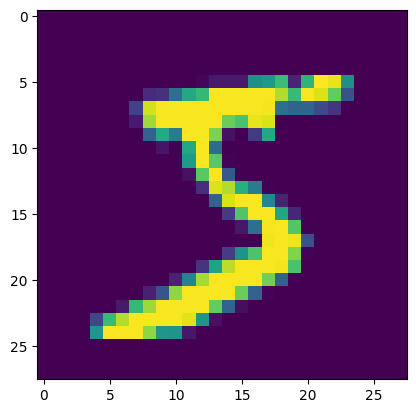

In [ ]:
plt.imshow(x_train[0,:,:])

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
y_train.shape

(60000, 10)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train=x_train.reshape(60000,28*28)
X_test=x_test.reshape(10000,28*28)

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.9001

# Red mulicapa con sci-kitlearn

In [ ]:
red_multicapa=MLPClassifier(hidden_layer_sizes=(5,3))

In [ ]:
red_multicapa.fit(X_train,y_train)
red_multicapa.score(X_test,y_test)

0.6535

# TensorFlow

Libreria de google para redes neuronales, antiguamente se usaba una libreria aparte llamada KERAS para armar las redes, hoy keras esta incluida en TF.

Esta es la arquitectura de nuestra red:

```
network = [
    FCLayer(784, 50),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]
```

Como implementamos esto en Tf?

In [ ]:
X_train.shape

(60000, 784)

## Estructura de la Red


https://playground.tensorflow.org/


```
network = [
    FCLayer(784, 50),
    ActivationLayer(relu, relu_prime),
    FCLayer(20, 10),
    SoftmaxLayer(10)
]
```



+ la primer capa tiene 50 'neuronas' (20 combinaciones lineales de las 784 variables)
+ la capa de activacion donde meto la no linealidad
+ una tercer capa que conecta 20 neuronas con las 10 neuronas finales (una por cada clase)
+ la ultima capa solo se encarga de normalizar la salida para obtener las probabilidades

Vamos a definir cada capa como una clase, una clase era una 'funcion' que podia tener funciones y variables embebidas. Durante todo el curso usamos objetos clase cuando usabamos un modelo, `modelo.fit`, etc.


In [ ]:
import tensorflow as tf
from tensorflow import keras as ks

In [ ]:
model = ks.models.Sequential()

#primer capa oculta 50 neuronas
model.add(ks.layers.Dense(50,activation=tf.nn.relu, input_shape=(784,)))

#segunda capa oculta 20 neuronas
model.add(ks.layers.Dense(20,activation=tf.nn.relu))

#capa de salida 10 neuronas (10 digitos clf multiclase)
model.add(ks.layers.Dense(10,activation=tf.nn.softmax))

model.compile(
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,480 (158.12 KB)

 Trainable params: 40,480 (158.12 KB)

 Non-trainable params: 0 (0.00 B)

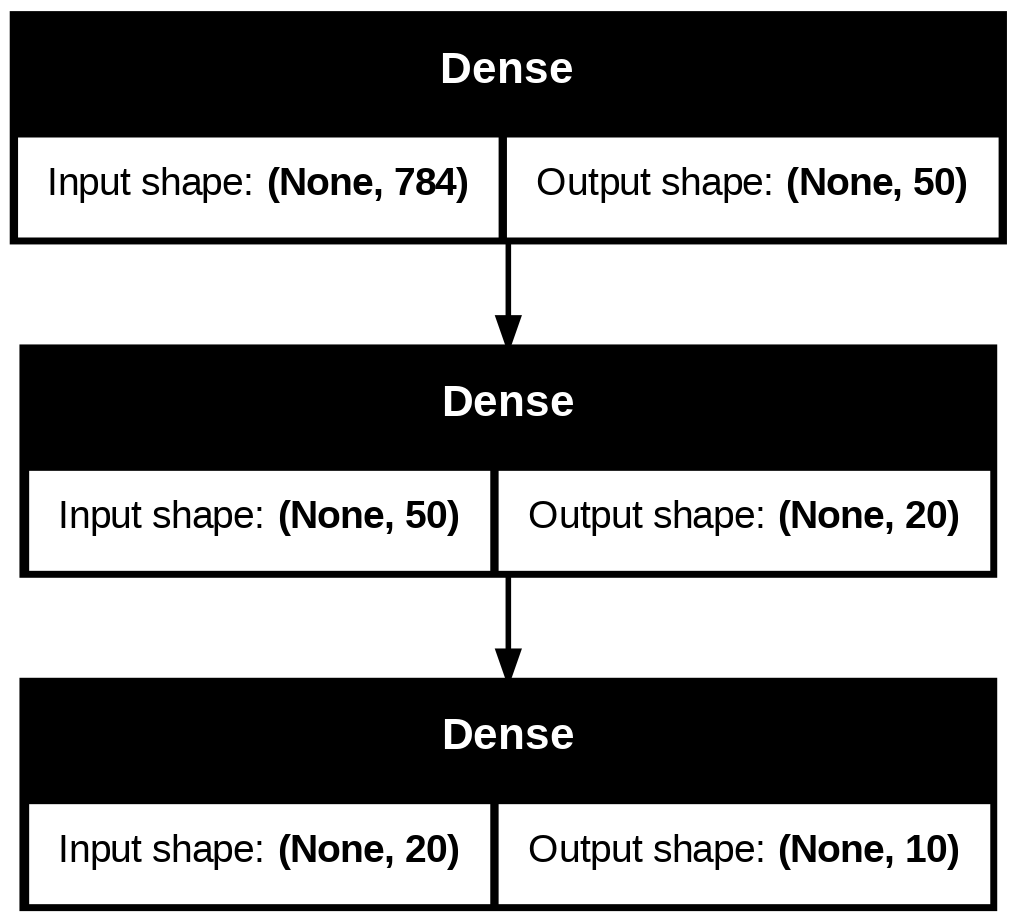

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.fit(X_train,y_train,epochs=10);

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8333 - loss: 0.5691
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9521 - loss: 0.1669
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9619 - loss: 0.1293
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.1037
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9739 - loss: 0.0894
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0803
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0732
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9795 - loss: 0.0674
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9812 - loss: 0.0621
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0604


## Validacion de la red

In [ ]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1275
loss->  0.1139298677444458 
acc->  0.9679999947547913


# Cuando usar deep learning? tiramos todo lo que aprendimos en el curso?

Miremos la performance de una NN en uno de los dataset que usamos en el curso, como el de 'hitter.csv' si, ese, malisimo! Ya se, pero bueno es uno de los que mas usamos (263 jugadores, 19 variables)

Ajustamos esos datos con una regresion lineal, lasso y una NN. Aca los resultados:

![](0.png)

No solo no performo mejor que una regresion comun, si no que ademas tiene 1.4k parametros!

https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html



![](https://cdn-images-1.medium.com/max/1600/0*GTzatEUd4cICPVub.)